In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
customer_df = pd.read_csv('Income Data.csv')
customer_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


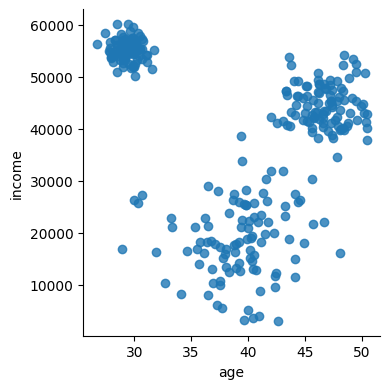

In [4]:
sns.lmplot(data = customer_df, x = "age", y = "income", fit_reg = False, height = 4, );

#### K-Means clustering

In [6]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customer_df)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [7]:
customer_df["clusterid"] = clusters.labels_

In [8]:
customer_df[0:5]

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


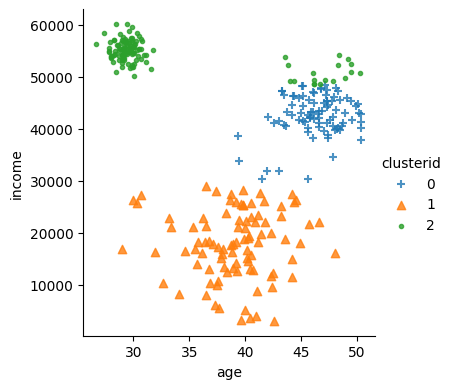

In [9]:
markers = ['+', '^', '.']
sns.lmplot(data = customer_df, x = "age", y = "income", hue = "clusterid", fit_reg = False, markers = markers, height = 4 );

#### Normalizing Features

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_customer_df = scaler.fit_transform(customer_df[["age", "income"]])
scaled_customer_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [13]:
from sklearn.cluster import KMeans

clusters_new = KMeans(3, random_state = 42)
clusters_new.fit(scaled_customer_df)
customer_df["clusterid_new"] = clusters_new.labels_

In [14]:
markers = ['+', '^', '.']

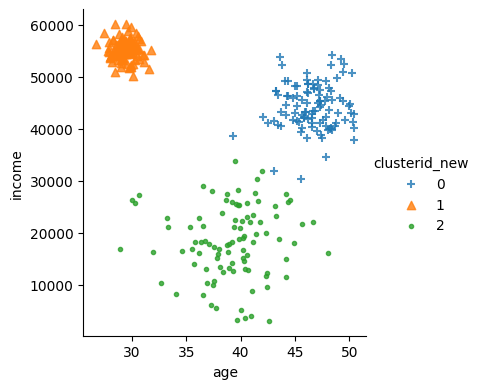

In [15]:
sns.lmplot(data = customer_df, 
           x = "age", y = "income", 
           hue = "clusterid_new", 
           fit_reg = False, 
           markers = markers, 
           height = 4 );

In [29]:
clusters.cluster_centers_

array([[4.25761364e+04, 4.63562500e+01],
       [1.78851064e+04, 3.90808511e+01],
       [5.45211864e+04, 3.20733051e+01]])

In [43]:
customer_df.groupby('clusterid')[['age','income']].agg(["mean",'std']).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  46.356250  2.361531  42576.136364  3953.232180
1         1  39.080851  3.594112  17885.106383  6573.046256
2         2  32.073305  6.472703  54521.186441  2521.797341